In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("StockX-Data-Contest-2019-3.csv")

In [3]:
# Starting with dropping all Off-White shoes to narrow it down to only Yeezy shoes

In [4]:
df.Brand.value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [5]:
mask = df.loc[df.Brand == "Off-White"].index

In [6]:
df.drop(mask, inplace=True)

In [7]:
df.rename(columns={"Order Date":"Order_date", "Sneaker Name":"Sneaker_name", "Sale Price":"Sale_price", 
           "Retail Price":"Retail_price", "Shoe Size":"Shoe_size", "Release Date":"Release_date", 
                   "Buyer Region":"Buyer_region"}, inplace=True)

# Changing columns to the right data type

In [8]:
df.Sale_price = df.Sale_price.replace('[\$,]', '', regex=True).astype(float)

In [9]:
df.Retail_price = df.Retail_price.replace('[\$,]', '', regex=True).astype(float)

In [10]:
df.Order_date = pd.to_datetime(df['Order_date'])

In [11]:
df.Release_date = pd.to_datetime(df['Release_date'])

In [12]:
df["Days_from_release"] = df.Order_date - df.Release_date

In [13]:
import numpy as np
df['Days_from_release'] = (df['Days_from_release'] / np.timedelta64(1,'D')).astype(int)

# Creating features

In [14]:
# splitting up the shoes by the type of color (dark or light)

In [15]:
import re

In [16]:
color_lst = []
for i in df.Sneaker_name:
    t = re.findall(r"\-350-.*", i)
    color_lst.append(t)

In [17]:
color_lst2 = []
for i in color_lst:
    for t in i:
        color_lst2.append(t)

In [18]:
df["Stock_numbers"] = color_lst2
df["Color_region"] = color_lst2
df["Color_type"] = color_lst2

In [19]:
df.Color_region.value_counts()

-350-V2-Butter                 11423
-350-V2-Beluga-2pt0            10395
-350-V2-Zebra                  10110
-350-V2-Blue-Tint               9297
-350-V2-Cream-White             9097
-350-V2-Sesame                  5553
-350-V2-Static                  4983
-350-V2-Semi-Frozen-Yellow      4854
-350-V2-Static-Reflective       3184
-350-V2-Core-Black-Red-2017      969
-350-V2-Core-Black-White         621
-350-Low-V2-Beluga               498
-350-V2-Core-Black-Red           302
-350-V2-Core-Black-Copper        225
-350-V2-Core-Black-Green         196
-350-Low-Pirate-Black-2016       122
-350-Low-Moonrock                100
-350-Low-Pirate-Black-2015        95
-350-Low-Oxford-Tan               70
-350-Low-Turtledove               68
Name: Color_region, dtype: int64

In [20]:
df.Color_region.replace({"-350-V2-Butter":"light", "-350-V2-Beluga-2pt0":"light", "-350-V2-Zebra":"light",
                        "-350-V2-Blue-Tint":"light", "-350-V2-Cream-White":"light", "-350-V2-Sesame":"light",
                        "-350-V2-Static":"light", "-350-V2-Semi-Frozen-Yellow":"light",
                        "-350-V2-Static-Reflective":"reflective", "-350-V2-Core-Black-Red-2017":"dark",
                        "-350-V2-Core-Black-White":"dark", "-350-Low-V2-Beluga":"light",
                        "-350-V2-Core-Black-Red":"dark", "-350-V2-Core-Black-Red":"dark",
                        "-350-V2-Core-Black-Copper":"dark", "-350-V2-Core-Black-Green":"dark",
                        "-350-Low-Pirate-Black-2016":"dark", "-350-Low-Moonrock":"light",
                        "-350-Low-Pirate-Black-2015":"dark", "-350-Low-Turtledove":"light",
                        "-350-Low-Oxford-Tan":"light"}, inplace=True)

In [21]:
df.Color_region.value_counts()

light         66448
reflective     3184
dark           2530
Name: Color_region, dtype: int64

In [22]:
df.groupby("Color_region").Sale_price.mean().to_frame()

,Sale_price
Color_region,
dark,784.043083
light,338.707952
reflective,468.145101


In [23]:
# Splitting up the shoes by how many of each shoe was released

In [24]:
df.Stock_numbers.replace({"-350-V2-Butter":"high", "-350-V2-Beluga-2pt0":"high", "-350-V2-Zebra":"high",
                        "-350-V2-Blue-Tint":"high", "-350-V2-Cream-White":"high", "-350-V2-Sesame":"high",
                        "-350-V2-Static":"high", "-350-V2-Semi-Frozen-Yellow":"medium",
                        "-350-V2-Static-Reflective":"low", "-350-V2-Core-Black-Red-2017":"medium",
                        "-350-V2-Core-Black-White":"medium", "-350-Low-V2-Beluga":"low",
                        "-350-V2-Core-Black-Red":"low", "-350-V2-Core-Black-Red":"low",
                        "-350-V2-Core-Black-Copper":"low", "-350-V2-Core-Black-Green":"low",
                        "-350-Low-Pirate-Black-2016":"very low", "-350-Low-Moonrock":"very low",
                        "-350-Low-Pirate-Black-2015":"very low", "-350-Low-Turtledove":"very low",
                        "-350-Low-Oxford-Tan":"very low"}, inplace=True)

In [25]:
stock_shoe_price = df.groupby(["Stock_numbers"]).Sale_price.mean().to_frame().sort_values(by="Sale_price")

In [26]:
stock_shoe_price

,Sale_price
Stock_numbers,
high,327.699760
medium,484.390751
low,553.090125
very low,1054.375824


In [27]:
# Splitting up the shoes up by what kind of color they are (Earthtone or not Earthtone)

In [28]:
df.Color_type.replace({"-350-V2-Butter":"Earthtone", "-350-V2-Beluga-2pt0":"Not earthtone", "-350-V2-Zebra":"Not earthtone",
                        "-350-V2-Blue-Tint":"Not earthtone", "-350-V2-Cream-White":"Earthtone", "-350-V2-Sesame":"Earthtone",
                        "-350-V2-Static":"Not earthtone", "-350-V2-Semi-Frozen-Yellow":"Not earthtone",
                        "-350-V2-Static-Reflective":"Not earthtone", "-350-V2-Core-Black-Red-2017":"Not earthtone",
                        "-350-V2-Core-Black-White":"Not earthtone", "-350-Low-V2-Beluga":"Not earthtone",
                        "-350-V2-Core-Black-Red":"Not earthtone", "-350-V2-Core-Black-Red":"Not earthtone",
                        "-350-V2-Core-Black-Copper":"Not earthtone", "-350-V2-Core-Black-Green":"Not earthtone",
                        "-350-Low-Pirate-Black-2016":"Not earthtone", "-350-Low-Moonrock":"Earthtone",
                        "-350-Low-Pirate-Black-2015":"Not earthtone", "-350-Low-Turtledove":"Not earthtone",
                        "-350-Low-Oxford-Tan":"Earthtone"}, inplace=True)

In [29]:
df.Color_type.value_counts()

Not earthtone    45919
Earthtone        26243
Name: Color_type, dtype: int64

In [30]:
df.groupby(["Color_type"]).Sale_price.mean().to_frame().sort_values(by="Sale_price")

,Sale_price
Color_type,
Earthtone,279.873109
Not earthtone,405.844182


# Plotting the data

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

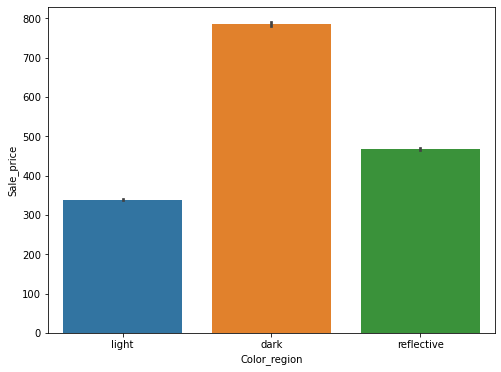

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Color_region", y="Sale_price")
plt.show()

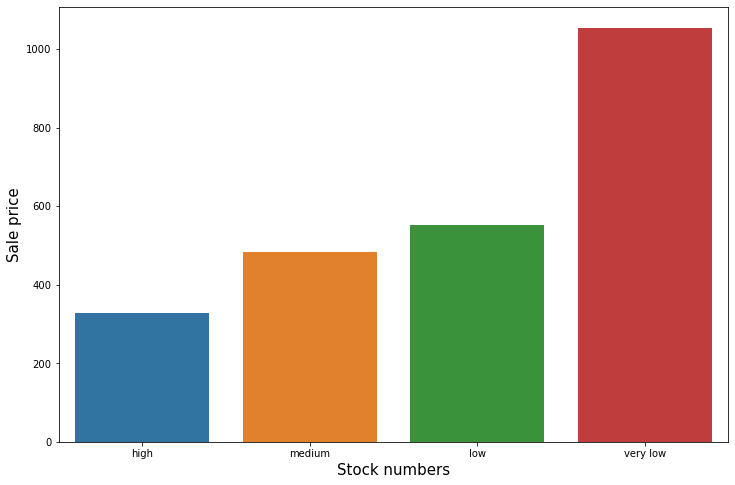

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(data=stock_shoe_price, x=stock_shoe_price.index, y="Sale_price")

plt.ylabel("Sale price", fontsize=15)
plt.xlabel("Stock numbers", fontsize=15)
plt.show()

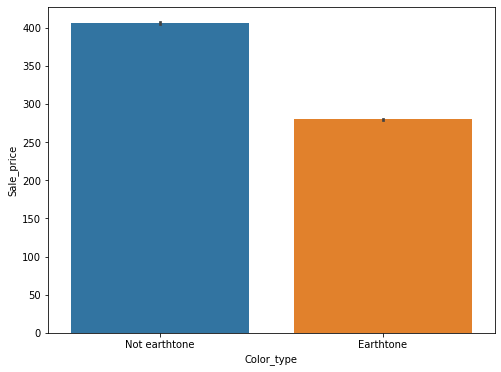

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Color_type", y="Sale_price")
plt.show()

In [35]:
import datetime

In [36]:
df['Order_date_yr_mt'] = df['Order_date'].dt.strftime('%Y-%m')

In [37]:
p = df[df['Sneaker_name'].isin(['adidas-Yeezy-Boost-350-V2-Butter','Adidas-Yeezy-Boost-350-V2-Beluga-2pt0', 
                            'Adidas-Yeezy-Boost-350-V2-Zebra', 'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
                            'Adidas-Yeezy-Boost-350-V2-Cream-White', 'Adidas-Yeezy-Boost-350-V2-Sesame'])]

In [38]:
p.Sneaker_name.value_counts()

adidas-Yeezy-Boost-350-V2-Butter         11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0    10395
Adidas-Yeezy-Boost-350-V2-Zebra          10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint       9297
Adidas-Yeezy-Boost-350-V2-Cream-White     9097
Adidas-Yeezy-Boost-350-V2-Sesame          5553
Name: Sneaker_name, dtype: int64

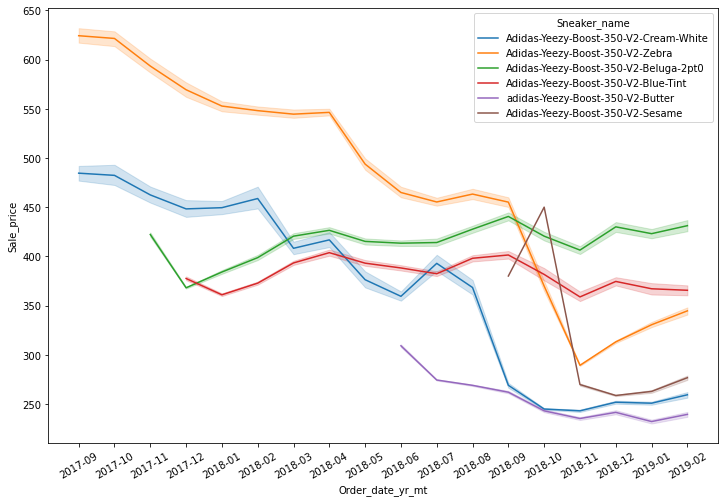

In [39]:
plt.figure(figsize=(12,8))
sns.lineplot(data=p, x="Order_date_yr_mt", y="Sale_price", hue="Sneaker_name")
plt.xticks(rotation=30)
plt.show()

In [40]:
bae_sizes = p[p['Shoe_size'].isin([4.5,5,5.5,6,6.5])]

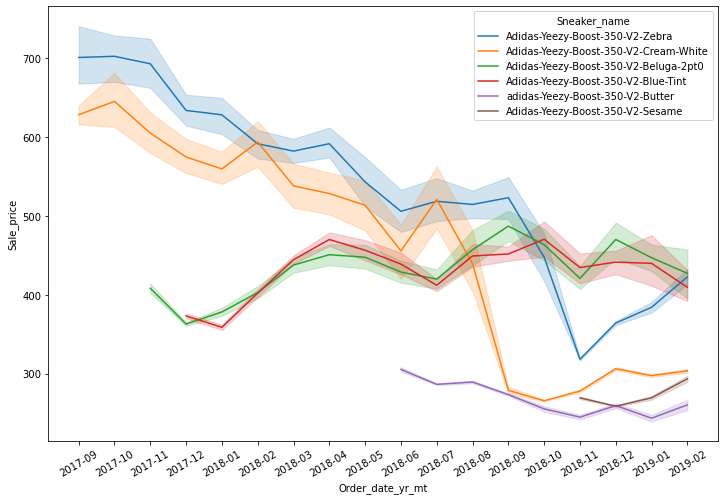

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(data=bae_sizes, x="Order_date_yr_mt", y="Sale_price", hue="Sneaker_name")
plt.xticks(rotation=30)
plt.show()

In [42]:
state_buyers = df.Buyer_region.value_counts().to_frame()

In [43]:
state_buyers = state_buyers.head(10)

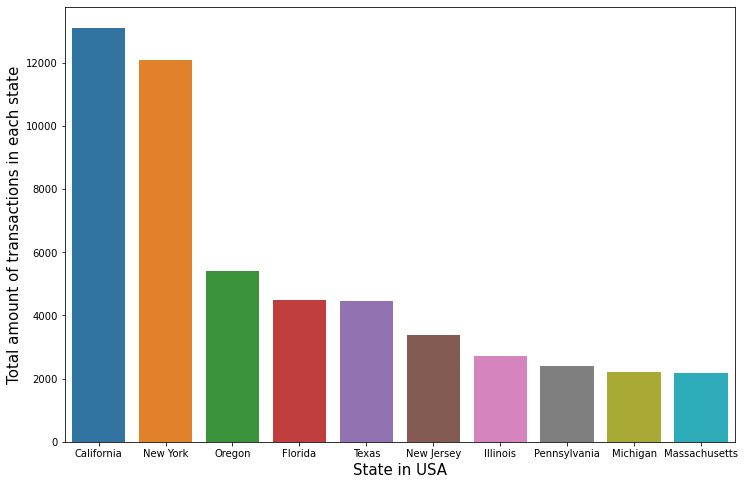

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(data=state_buyers, x=state_buyers.index, y="Buyer_region")

plt.xlabel("State in USA", fontsize=15)
plt.ylabel("Total amount of transactions in each state", fontsize=15)

plt.show()

# Clustering

In [45]:
temp = df.copy()

In [46]:
temp.Stock_numbers.replace({"high":0, "medium":1, "low":2, "very low":3}, inplace=True)

In [47]:
temp_dummies = pd.get_dummies(data=temp, columns=["Sneaker_name", "Buyer_region", "Color_region", "Color_type"])

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
temp_dummies.drop(columns=["Order_date", "Order_date_yr_mt"], inplace=True)

In [50]:
temp_dummies.drop(columns=["Brand"], inplace=True)

In [51]:
scaler = StandardScaler()

In [52]:
temp_dummies.drop(columns="Release_date", inplace=True)

In [53]:
nums_scaled = scaler.fit_transform(temp_dummies)

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans()

In [56]:
inertia_lst = []

for i in range(1,5):
    kmeans = KMeans(n_clusters = i)
    
    kmeans.fit(temp_dummies)
    
    inertia = kmeans.inertia_
    
    print(inertia)
    
    inertia_lst.append(inertia)

6086945356.836902
2172573402.6564794
1424831412.6601868
1031781935.8774835


In [57]:
inertia_lst = pd.Series(inertia_lst)

In [58]:
inertia_lst.index + 1

RangeIndex(start=1, stop=5, step=1)

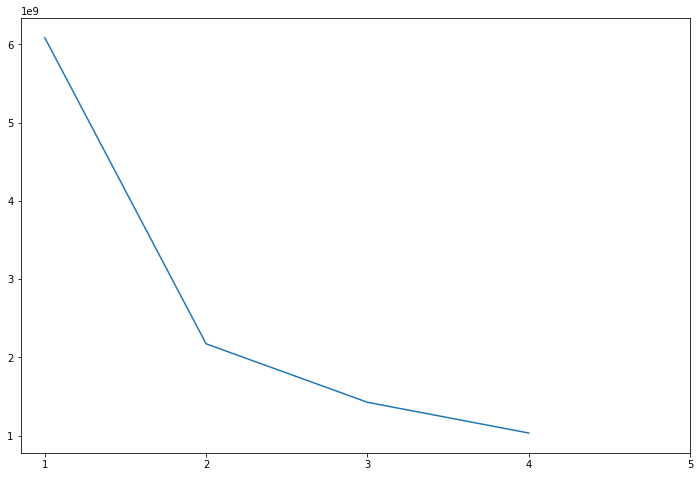

In [59]:
plt.figure(figsize=(12,8))
sns.lineplot(x = inertia_lst.index + 1, y = inertia_lst.values)
plt.xticks([1,2,3,4,5])

plt.show()

In [60]:
kmeans = KMeans(n_clusters = 2)

In [61]:
kmeans.fit(nums_scaled)

KMeans(n_clusters=2)

In [62]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [63]:
temp["2_clusters"] = kmeans.labels_

In [64]:
temp.head()

,Order_date,Brand,Sneaker_name,Sale_price,Retail_price,Release_date,Shoe_size,Buyer_region,Days_from_release,Stock_numbers,Color_region,Color_type,Order_date_yr_mt,2_clusters
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,342,2,light,Not earthtone,2017-09,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,282,2,dark,Not earthtone,2017-09,0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,282,2,dark,Not earthtone,2017-09,0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,282,2,dark,Not earthtone,2017-09,0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,202,1,dark,Not earthtone,2017-09,0


In [65]:
temp.loc[temp["2_clusters"] == 0].Color_region.value_counts()

reflective    3184
dark          2530
light          239
Name: Color_region, dtype: int64

In [66]:
temp.loc[temp["2_clusters"] == 1].Color_region.value_counts()

light    66209
Name: Color_region, dtype: int64

In [67]:
temp.groupby("2_clusters").mean()

,Sale_price,Retail_price,Shoe_size,Days_from_release,Stock_numbers
2_clusters,,,,,
0,629.988745,218.471359,9.159583,280.961364,1.809340
1,335.760184,220.000000,9.245412,227.157713,0.088326


In [68]:
temp

,Order_date,Brand,Sneaker_name,Sale_price,Retail_price,Release_date,Shoe_size,Buyer_region,Days_from_release,Stock_numbers,Color_region,Color_type,Order_date_yr_mt,2_clusters
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,342,2,light,Not earthtone,2017-09,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,282,2,dark,Not earthtone,2017-09,0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,282,2,dark,Not earthtone,2017-09,0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,282,2,dark,Not earthtone,2017-09,0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,202,1,dark,Not earthtone,2017-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220.0,2018-12-26,8.0,Oregon,49,2,reflective,Not earthtone,2019-02,0
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220.0,2018-12-26,8.5,California,49,2,reflective,Not earthtone,2019-02,0
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220.0,2018-12-26,5.5,New York,49,2,reflective,Not earthtone,2019-02,0
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220.0,2018-12-26,11.0,California,49,2,reflective,Not earthtone,2019-02,0


# Machine Learning

In [69]:
X = temp_dummies.drop(columns="Sale_price")
y = temp_dummies.Sale_price

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Both classification and regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [73]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
]

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# Checking which model get the best r2 score to decide which one im gonna use

for regressor in regressors:
    grid = GridSearchCV(estimator=regressor, param_grid={}, cv=5)
    
    grid.fit(X_train, y_train)
    
    print(regressor, grid.best_score_)
    print("")

LinearRegression() 0.7846661036945484

DecisionTreeRegressor() 0.9596007208938181

RandomForestRegressor() 0.9731415001421521

SVR() 0.07225634407418513

KNeighborsRegressor() 0.8042216373954713



In [76]:
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={}, cv=5)

In [77]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), param_grid={})

In [78]:
best_estimator = grid.best_estimator_

In [79]:
grid.score(X_test, y_test)

0.9765859275045077

In [80]:
y_pred = grid.best_estimator_.predict(X_test)

In [81]:
y_test.reset_index(drop = True, inplace=True)

<AxesSubplot:ylabel='Sale_price'>

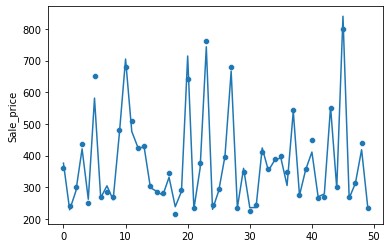

In [82]:
sns.lineplot(data = y_pred[0:50])
sns.scatterplot(data = y_test[0:50])

In [83]:
pd.options.display.max_columns = 100

## Adding sale price from 2021 manually to compare to my MH model predictions

In [288]:
temp1 = temp.copy()

In [289]:
temp1 = temp1.append({"Order_date":"2021-06-05 00:00:00", "Brand":"Yeezy", "Sneaker_name":
                   "adidas-Yeezy-Boost-350-V2-Butter",
                  "Sale_price":565, "Retail_price":220, "Release_date":"2018-06-30",
                   "Shoe_size":5.5, "Buyer_region":"California","Days_from_release":1071,
                   "Stock_numbers":3, "Color_region":"light","Order_date_yr_mt":"2021-06",
                   "Color_type":"Earthtone", "Current_price":0, "2_clusters":1.0}, 
                   ignore_index=True)

In [290]:
temp1 = temp1.append({"Order_date":"2021-06-05 00:00:00", "Brand":"Yeezy", "Sneaker_name":
                   "adidas-Yeezy-Boost-350-V2-Butter",
                  "Sale_price":429, "Retail_price":220, "Release_date":"2018-06-30",
                   "Shoe_size":9.5, "Buyer_region":"California","Days_from_release":1071,
                   "Stock_numbers":3, "Color_region":"light","Order_date_yr_mt":"2021-06",
                   "Color_type":"Earthtone", "Current_price":0, "2_clusters":1.0}, 
                   ignore_index=True)

In [291]:
temp1 = temp1.append({"Order_date":"2021-06-05 00:00:00", "Brand":"Yeezy", "Sneaker_name":
                   "adidas-Yeezy-Boost-350-V2-Butter",
                  "Sale_price":356, "Retail_price":220, "Release_date":"2018-06-30",
                   "Shoe_size":12.5, "Buyer_region":"California","Days_from_release":1071,
                   "Stock_numbers":3, "Color_region":"light","Order_date_yr_mt":"2021-06",
                   "Color_type":"Earthtone", "Current_price":0, "2_clusters":1.0}, 
                   ignore_index=True)

In [292]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Sesame","Sale_price":750, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":5.5, "Buyer_region":"California", "Days_from_release":921,
                   "Stock_numbers":3, "Color_region":"light","Order_date_yr_mt":"2021-06",
                   "Color_type":"Earthtone", "Current_price":0, "2_clusters":1.0}, 
                   ignore_index=True)

In [293]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Sesame","Sale_price":499, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":9.5, "Buyer_region":"California", "Days_from_release":921,
                   "Stock_numbers":3, "Color_region":"light","Order_date_yr_mt":"2021-06",
                   "Color_type":"Earthtone", "Current_price":0, "2_clusters":1.0}, 
                   ignore_index=True)

In [294]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Sesame","Sale_price":583, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":9.5, "Buyer_region":"California", "Days_from_release":921,
                   "Stock_numbers":3, "Color_region":"light","Order_date_yr_mt":"2021-06",
                   "Color_type":"Earthtone", "Current_price":0, "2_clusters":1.0}, 
                   ignore_index=True)

In [295]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Core-Black-Green","Sale_price":613, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":5.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [296]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Core-Black-Green","Sale_price":779, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":9.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [297]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Core-Black-Green","Sale_price":673, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":12.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [298]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Core-Black-Red","Sale_price":2129, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":5.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [299]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Core-Black-Red","Sale_price":1167, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":9.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [300]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-V2-Core-Black-Red","Sale_price":799, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":12.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [301]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-Low-V2-Beluga","Sale_price":1246, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":5.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [302]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-Low-V2-Beluga","Sale_price":1076, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":9.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [303]:
temp1 = temp1.append({"Order_date":"2021-06-01 00:00:00", "Brand":"Yeezy", 
             "Sneaker_name":"Adidas-Yeezy-Boost-350-Low-V2-Beluga","Sale_price":725, "Retail_price":220, 
             "Release_date":"2018-11-23", "Shoe_size":12.5, "Buyer_region":"California", "Days_from_release":1460,
                   "Stock_numbers":1, "Color_region":"dark","Order_date_yr_mt":"2021-06",
                   "Color_type":"Not earthtone", "Current_price":0, "2_clusters":0.0}, 
                   ignore_index=True)

In [304]:
temp1_dummies = pd.get_dummies(data=temp1, columns=["Sneaker_name", "Buyer_region", "Color_region", "Color_type"])
temp1_dummies.drop(columns=["Order_date", "Order_date_yr_mt", "Brand", "Release_date", 
                            "2_clusters", "Current_price"], inplace=True)

In [305]:
X = temp1_dummies.drop(columns="Sale_price")
y = temp1_dummies.Sale_price

In [306]:
mh_test_pred = best_estimator.predict(X)

In [307]:
mh_test_pred[-15:]

array([ 731.68      ,  677.17      ,  671.83166667,  834.99      ,
        724.35      ,  724.35      ,  736.16      ,  629.81      ,
        620.73      , 1228.69      ,  953.89      ,  787.43      ,
        747.68      ,  636.39      ,  638.67      ])

In [308]:
mh_predictions = temp1.tail(15).copy()

In [309]:
mh_predictions["MH_predictions_2021"] = [ 657.3,  613.51083333,639.84666667, 769.91,
        672.48083333,672.48083333,752.26,635.8,
        619.21, 1166.55, 957.83, 797.4,
        769.61, 643.12, 637.58]

In [310]:
mh_predictions.sort_values(by="Sale_price", inplace = True)

In [311]:
mh_predictions = mh_predictions.reset_index().drop(columns="index")

# Plotting how accurate my MH model predictions were

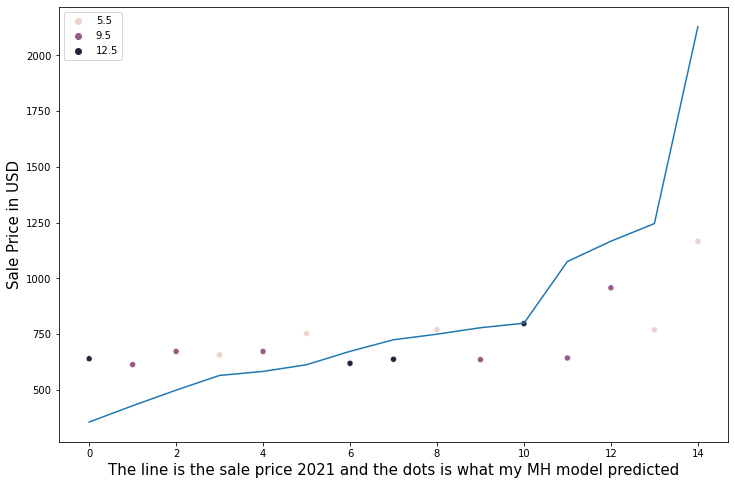

In [313]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = mh_predictions,x = mh_predictions.index, y = "MH_predictions_2021", hue="Shoe_size")
sns.lineplot(data=mh_predictions, x=mh_predictions.index, y="Sale_price")

plt.ylabel("Sale Price in USD", fontsize=15)
plt.xlabel("The line is the sale price 2021 and the dots is what my MH model predicted", fontsize=15)

plt.show()

In [314]:
comparing_2018_2021 = df[df['Sneaker_name'].isin(['adidas-Yeezy-Boost-350-V2-Butter', 'Adidas-Yeezy-Boost-350-V2-Sesame',
                                    "Adidas-Yeezy-Boost-350-Low-V2-Beluga", "Adidas-Yeezy-Boost-350-V2-Core-Black-Red",
                                    "Adidas-Yeezy-Boost-350-V2-Core-Black-Green"])]

In [315]:
comparing_2018_2021 = comparing_2018_2021[comparing_2018_2021["Shoe_size"].isin([5.5,9.5,12.5])]

In [316]:
comparing_2018_2021["Year"] = pd.DatetimeIndex(comparing_2018_2021['Order_date']).year

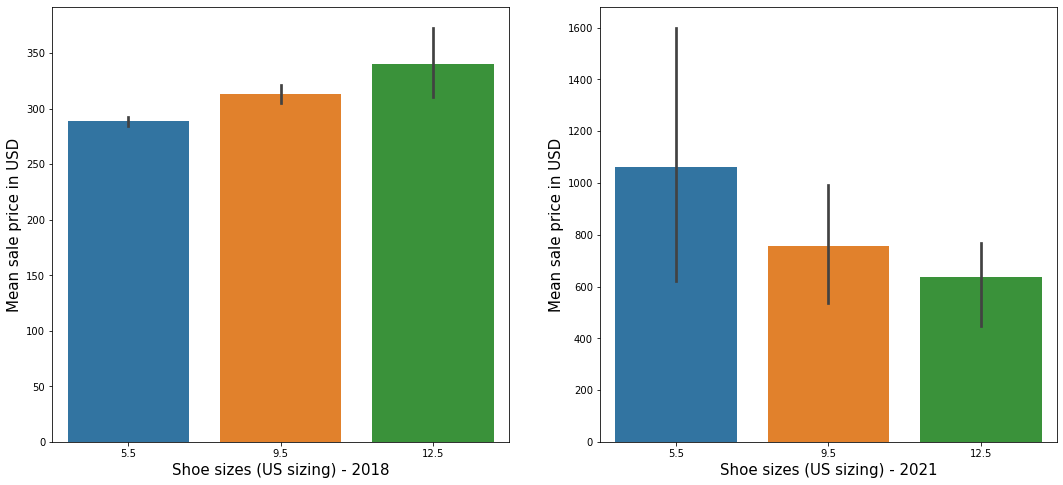

In [317]:
fig,ax = plt.subplots(1,2, figsize=(18,8))

sns.barplot(data=comparing_2018_2021, x="Shoe_size", y="Sale_price", ax=ax[0])

sns.barplot(data=mh_predictions, x="Shoe_size", y="Sale_price", ax=ax[1])

ax[0].set_xlabel("Shoe sizes (US sizing) - 2018", fontsize = 15)
ax[1].set_xlabel("Shoe sizes (US sizing) - 2021", fontsize = 15)

ax[0].set_ylabel("Mean sale price in USD", fontsize=15)
ax[1].set_ylabel("Mean sale price in USD", fontsize=15)

plt.show()

In [318]:
for i in comparing_2018_2021.Sneaker_name.value_counts().index:
    print('"'+ i +'"')

"adidas-Yeezy-Boost-350-V2-Butter"
"Adidas-Yeezy-Boost-350-V2-Sesame"
"Adidas-Yeezy-Boost-350-Low-V2-Beluga"
"Adidas-Yeezy-Boost-350-V2-Core-Black-Red"
"Adidas-Yeezy-Boost-350-V2-Core-Black-Green"


In [319]:
butter_pred = mh_predictions.loc[mh_predictions.Sneaker_name == "adidas-Yeezy-Boost-350-V2-Butter"]
sesame_pred = mh_predictions.loc[mh_predictions.Sneaker_name == "Adidas-Yeezy-Boost-350-V2-Sesame"]
beluga_pred = mh_predictions.loc[mh_predictions.Sneaker_name == "Adidas-Yeezy-Boost-350-Low-V2-Beluga"]
corered_pred = mh_predictions.loc[mh_predictions.Sneaker_name == "Adidas-Yeezy-Boost-350-V2-Core-Black-Red"]
coregreen_pred = mh_predictions.loc[mh_predictions.Sneaker_name == "Adidas-Yeezy-Boost-350-V2-Core-Black-Green"]

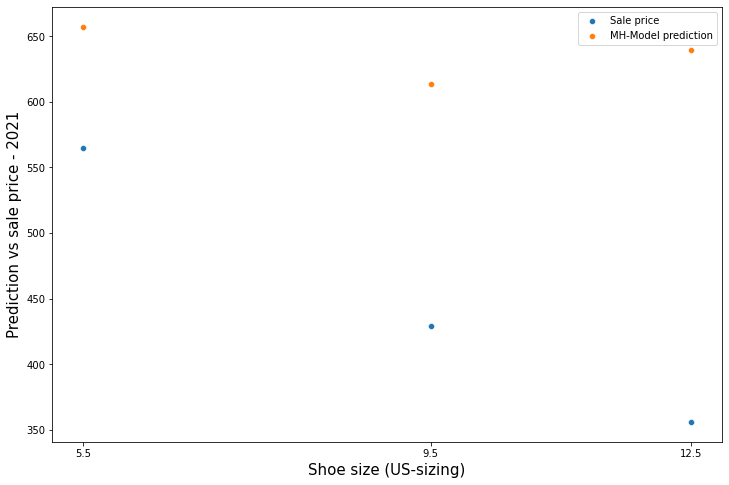

In [320]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = butter_pred, x="Shoe_size", y="Sale_price")
sns.scatterplot(data = butter_pred, x="Shoe_size", y="MH_predictions_2021")
plt.legend(["Sale price", "MH-Model prediction"])
plt.xticks(ticks=[5.5,9.5,12.5])
plt.xlabel("Shoe size (US-sizing)", fontsize=15)
plt.ylabel("Prediction vs sale price - 2021", fontsize=15)
plt.show()

In [321]:
sesame_pred.Shoe_size[72167] = 12.5

<ipython-input-321-dc32bae08b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sesame_pred.Shoe_size[72167] = 12.5
/Users/maxlarsson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/maxlarsson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


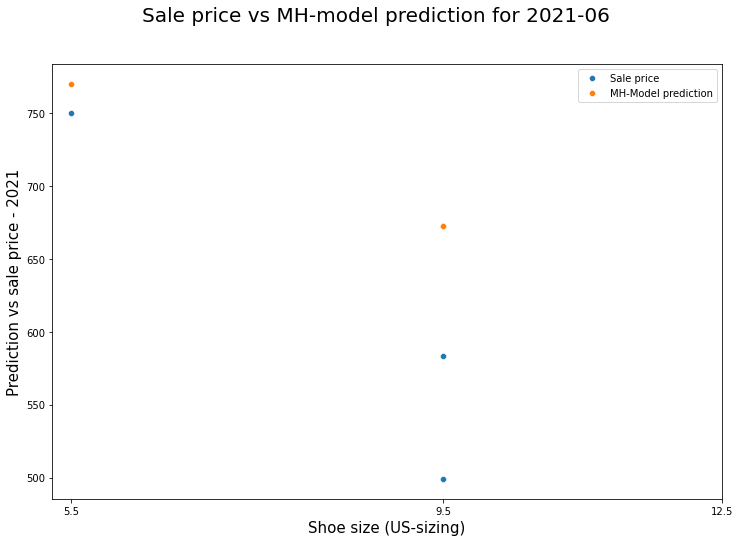

In [322]:
fig = plt.figure(figsize=(12,8))

sns.scatterplot(data = sesame_pred, x="Shoe_size", y="Sale_price")
sns.scatterplot(data = sesame_pred, x="Shoe_size", y="MH_predictions_2021")

fig.suptitle('Sale price vs MH-model prediction for 2021-06', fontsize=20)

plt.legend(["Sale price", "MH-Model prediction"])
plt.xticks(ticks=[5.5,9.5,12.5])
plt.xlabel("Shoe size (US-sizing)", fontsize=15)
plt.ylabel("Prediction vs sale price - 2021", fontsize=15)

plt.show()

In [323]:
comparing_2018_2021

,Order_date,Brand,Sneaker_name,Sale_price,Retail_price,Release_date,Shoe_size,Buyer_region,Days_from_release,Stock_numbers,Color_region,Color_type,Order_date_yr_mt,Year
181,2017-09-10,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,640.0,220.0,2016-11-23,9.5,Oregon,291,low,dark,Not earthtone,2017-09,2017
208,2017-09-11,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1200.0,220.0,2016-11-23,12.5,Texas,292,low,dark,Not earthtone,2017-09,2017
238,2017-09-12,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,650.0,220.0,2016-11-23,9.5,Oregon,293,low,dark,Not earthtone,2017-09,2017
239,2017-09-12,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,642.0,220.0,2016-11-23,9.5,Oregon,293,low,dark,Not earthtone,2017-09,2017
373,2017-09-17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,970.0,220.0,2016-09-24,9.5,California,358,low,light,Not earthtone,2017-09,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99878,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,245.0,220.0,2018-06-30,9.5,Oregon,228,high,light,Earthtone,2019-02,2019
99879,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,275.0,220.0,2018-06-30,5.5,Oregon,228,high,light,Earthtone,2019-02,2019
99881,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,274.0,220.0,2018-06-30,5.5,Oregon,228,high,light,Earthtone,2019-02,2019
99892,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,240.0,220.0,2018-06-30,9.5,Oregon,228,high,light,Earthtone,2019-02,2019


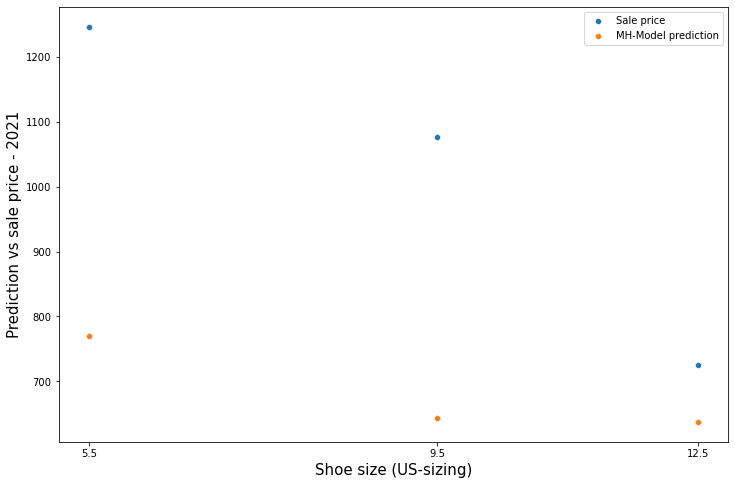

In [324]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = beluga_pred, x="Shoe_size", y="Sale_price")
sns.scatterplot(data = beluga_pred, x="Shoe_size", y="MH_predictions_2021")

plt.legend(["Sale price", "MH-Model prediction"])
plt.xticks(ticks=[5.5,9.5,12.5])
plt.xlabel("Shoe size (US-sizing)", fontsize=15)
plt.ylabel("Prediction vs sale price - 2021", fontsize=15)

plt.show()

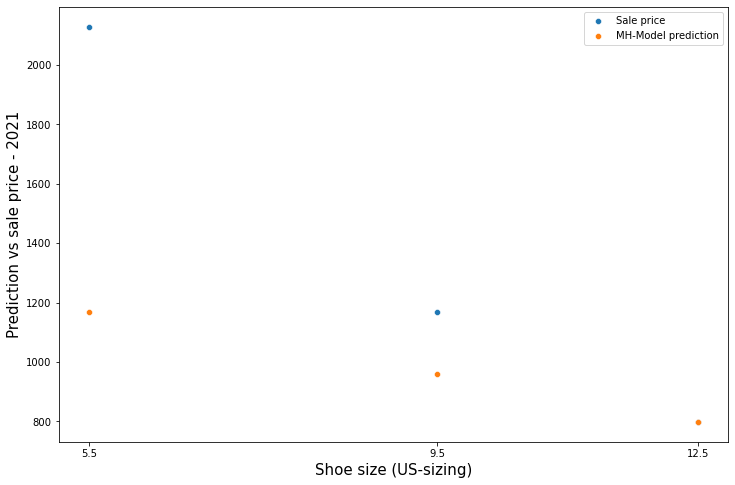

In [325]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = corered_pred, x="Shoe_size", y="Sale_price")
sns.scatterplot(data = corered_pred, x="Shoe_size", y="MH_predictions_2021")
plt.legend(["Sale price", "MH-Model prediction"])
plt.xticks(ticks=[5.5,9.5,12.5])
plt.xlabel("Shoe size (US-sizing)", fontsize=15)
plt.ylabel("Prediction vs sale price - 2021", fontsize=15)
plt.show()

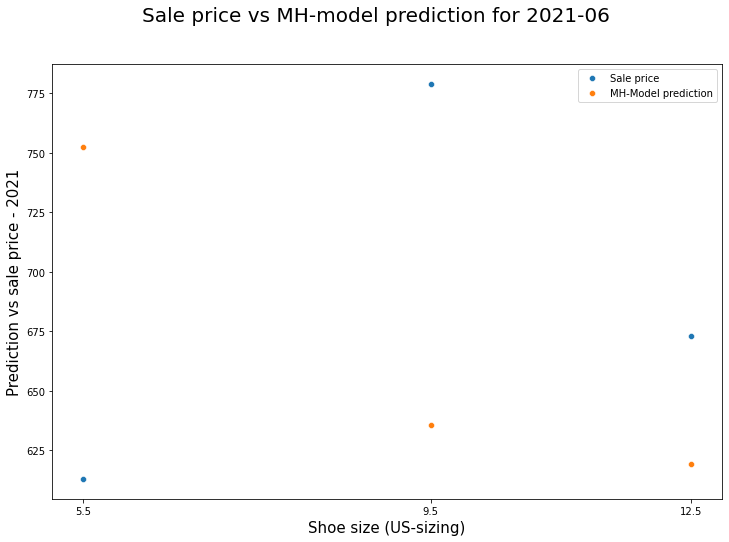

In [326]:
fig = plt.figure(figsize=(12,8))

sns.scatterplot(data = coregreen_pred, x="Shoe_size", y="Sale_price")
sns.scatterplot(data = coregreen_pred, x="Shoe_size", y="MH_predictions_2021")

fig.suptitle("Sale price vs MH-model prediction for 2021-06", fontsize=20)

plt.legend(["Sale price", "MH-Model prediction"])
plt.xticks(ticks=[5.5,9.5,12.5])
plt.xlabel("Shoe size (US-sizing)", fontsize=15)
plt.ylabel("Prediction vs sale price - 2021", fontsize=15)
plt.show()

In [327]:
red_price = (df.loc[(df.Sneaker_name == "Adidas-Yeezy-Boost-350-Low-V2-Beluga")])

In [328]:
red_price = red_price[red_price["Shoe_size"].isin([5.5, 9.5, 12.5])]

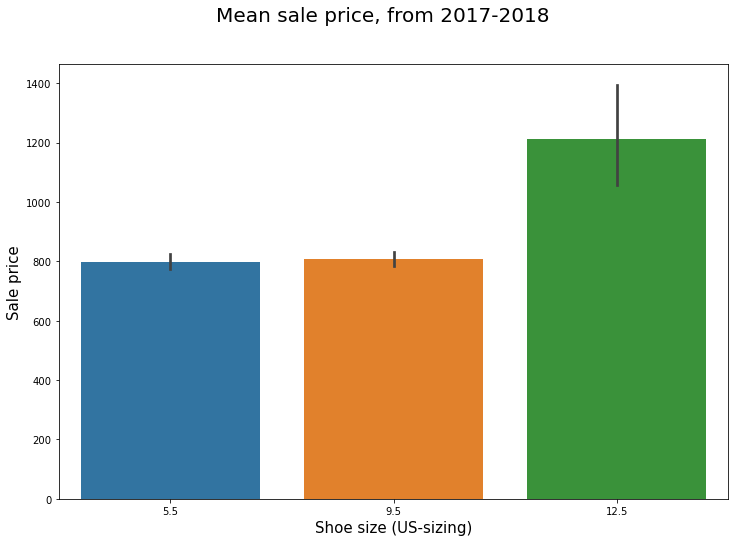

In [329]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=red_price, x="Shoe_size", y="Sale_price")
plt.xlabel("Shoe size (US-sizing)", fontsize=15)
plt.ylabel("Sale price", fontsize=15)

fig.suptitle('Mean sale price, from 2017-2018', fontsize=20)


plt.show()